## Checking the quality of reads - Working with FASTQ files

Here, we will work with FASTQ files, the standard format output used by modern sequencers. You will learn how to work with quality scores per base.

This is a fairly small file (27 MB) and represents part of the sequenced data of a Yoruban female (NA18489). If you refer to the 1,000 Genomes Project

In [1]:
! wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

--2024-02-25 22:03:31--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => ‘SRR003265.filt.fastq.gz’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.193.167
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.193.167|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... done.    ==> RETR SRR003265.filt.fastq.gz ... done.
Length: 28919712 (28M) (unauthoritative)

SRR003265.filt.fast 100%[===================>]  27.58M  8.01MB/s    in 3.4s    

2024-02-25 22:03:36 (8.01 MB/s) - ‘SRR003265.filt.fastq.gz’ saved [28919712]



### FastQ format 
```
@SRR003258.1 30443AAXX:1:1:1053:1999 length=51 
ACCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCACACACACCAACAC
+
=IIIIIIIII5IIIIIII>IIII+GIIIIIIIIIIIIII(IIIII01&III
```

1. Header
2. Sequence
3. read strand 
4. quality score of each base

In [2]:
from collections import defaultdict
import gzip

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 

from Bio import SeqIO

records = SeqIO.parse(gzip.open("SRR003265.filt.fastq.gz", "rt", encoding="utf-8"), "fastq" )
record = next(records)
print(record)
print(record.id, record.description, record.seq) 
print(record.letter_annotations) # return dictionary with list of phred scores

ID: SRR003265.31
Name: SRR003265.31
Description: SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
Number of features: 0
Per letter annotation for: phred_quality
Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA')
SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


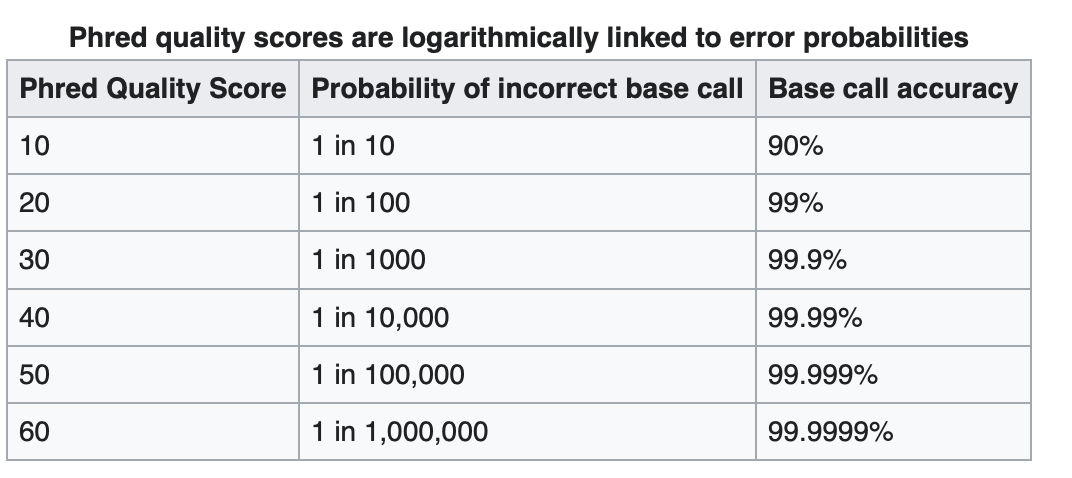

In [8]:
## NEVER DO THIS -- CAN OVERLOAD MEMORY
recs = SeqIO.parse(gzip.open("SRR003265.filt.fastq.gz","rt",  encoding="UTF-8"), "fastq")
recs = list(recs)
recs

[SeqRecord(seq=Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA'), id='SRR003265.31', name='SRR003265.31', description='SRR003265.31 3042NAAXX:3:1:1252:1819 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GAAATTTGTTTGCAGACCTCTGTGCAAACAAATTTCAGATTGGAAGAGCGT'), id='SRR003265.216', name='SRR003265.216', description='SRR003265.216 3042NAAXX:3:1:433:1251 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GATAATGATCTGAAGTTTTATTTTTTCACCAGGTCTCTGCCACATTTTTGT'), id='SRR003265.404', name='SRR003265.404', description='SRR003265.404 3042NAAXX:3:1:1902:1672 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GTTTTTTTGTTGATTCTTTCAGATTTTCTACCTAGAGAATCACATCAACTG'), id='SRR003265.422', name='SRR003265.422', description='SRR003265.422 3042NAAXX:3:1:1903:2036 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GTTAGGGGGCATGTGAGGGAAGAGAATAAGAGACTGCCTGATAATTCAGGA'), id='SRR003265.542', name='SRR003265.542', description='SRR003265.542 3042NAAXX:3:1:1911:1074 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GATTTGAGGCCAATCTTTG

In [9]:
records = SeqIO.parse(gzip.open("SRR003265.filt.fastq.gz","rt", encoding="utf-8"), "fastq")
count = defaultdict(int)

for rec in records:
    for letter in rec.seq:
        count[letter] += 1

tot = sum(count.values())
for letter, count in count.items():
    print('%s: %.2f %d' % (letter, 100. * count / tot, count)) # %s = string, %d = decimal or int, %.f2 is float with two decimals

G: 20.68 5359334
A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
N: 0.14 37289


N -- ambiguous base call

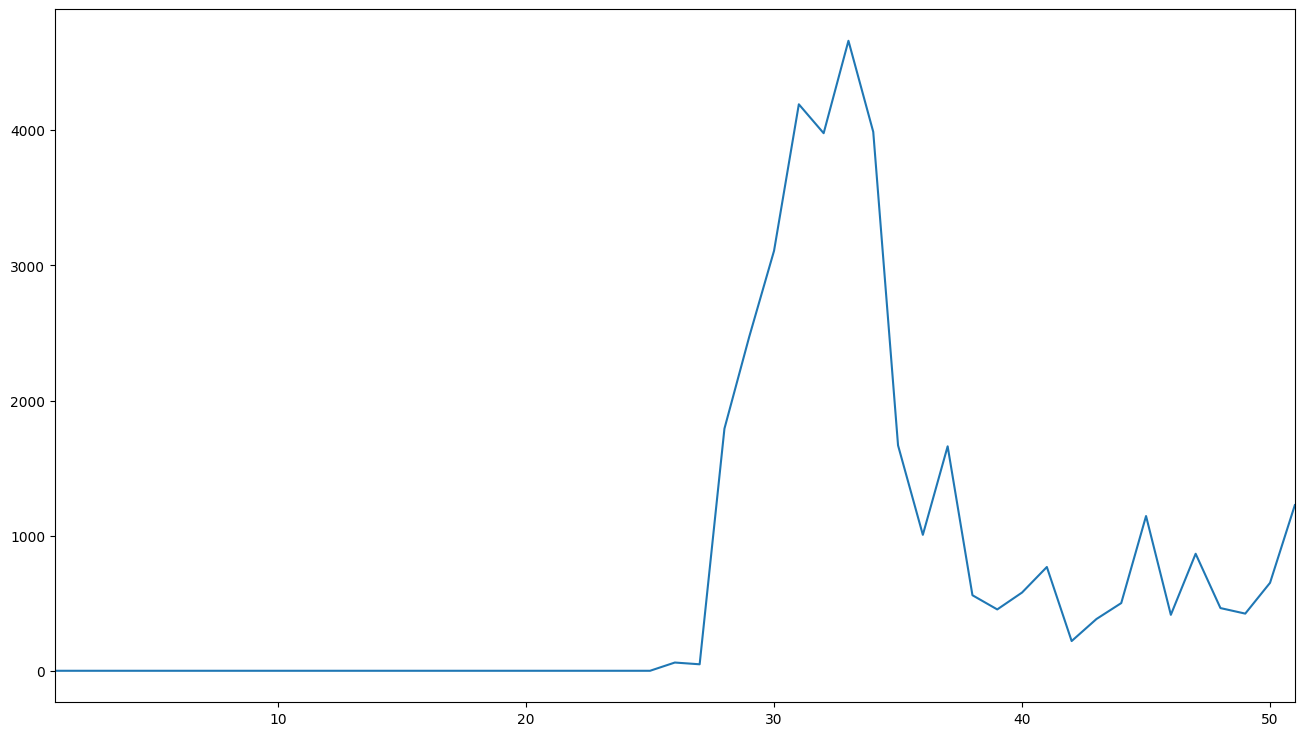

In [6]:
# example of how to plot where N base calls begin to occur
recs = SeqIO.parse(gzip.open("SRR003265.filt.fastq.gz", "rt", encoding="utf-8"), "fastq")
n_cnt = defaultdict(int) #default dic takes default as paramter, int in this case

for rec in recs:
    for i, letter in enumerate(rec.seq): #enumerate returns tuple-element pair 
        pos = i + 1 # 0 index for enumerate by default
        if letter == "N":
            n_cnt[pos] += 1 
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1) # range is not inclusive, must add 1 to get last item
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(positions, [n_cnt[x] for x in positions])
ax.set_xlim(1, seq_len)
pass

In [7]:
## Checking quality of reads using Phred score
# example of how to plot where N base calls begin to occur
recs = SeqIO.parse(gzip.open("SRR003265.filt.fastq.gz", "rt", encoding="utf-8"), "fastq")
cnt_qual = defaultdict(int) #default dic takes default as paramter, int in this case
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations["phred_quality"]): # must access "phred quality" key
        if i > 25: # N does not appear until positions 25
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print("%d: %.2f %d" % (qual, 100. * cnt / tot, cnt))

40: 67.38 8903139
30: 0.72 94572
23: 0.78 102550
32: 0.70 92958
35: 0.68 89899
29: 0.72 95753
34: 0.68 90451
24: 0.76 100964
19: 0.81 107024
18: 0.82 108052
31: 0.71 93692
8: 0.88 115709
22: 0.79 104212
25: 0.76 100673
26: 0.75 99309
33: 0.70 92131
14: 0.85 112569
21: 0.79 104842
27: 0.74 98151
12: 0.87 114868
36: 0.67 88166
10: 1.75 231352
6: 0.87 114302
5: 1.71 226489
11: 0.87 115403
39: 0.65 86162
38: 0.66 86829
15: 0.84 111634
37: 0.67 88160
20: 0.80 105620
9: 0.87 115497
17: 0.83 109595
4: 1.71 226387
16: 0.84 110943
13: 0.86 113248
28: 0.73 97022
7: 0.87 115252
3: 1.14 150184
2: 0.74 97749
1: 0.02 2158
0: 0.00 206


/var/folders/09/j496qgmn219cm9yb18cv1jc80000gp/T/ipykernel_3584/947708167.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])


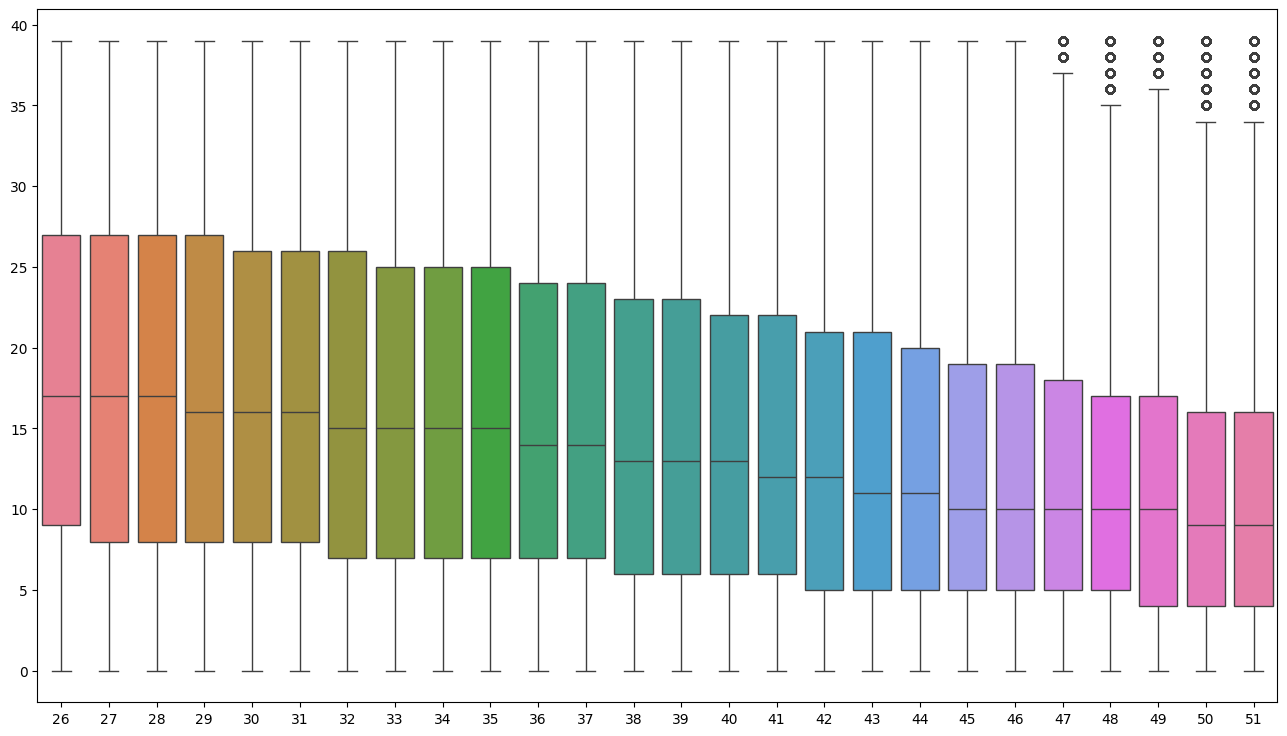

In [11]:
# example of how to plot where N base calls begin to occur
recs = SeqIO.parse(gzip.open("SRR003265.filt.fastq.gz", "rt", encoding="utf-8"), "fastq")
qual_pos = defaultdict(list) #default dic takes default as parameter, we'll be adding a list here. each position has qual scores from each read
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations["phred_quality"]):
        if i < 25 or qual == 40: # continue pass 40 qual score and index under 25
            continue
        pos = i + 1 # adding one since enumerate is 0 index
        qual_pos[pos].append(qual) # for key `pos` append the qual of every read. will only append after 25 
vps = []
poses = list(qual_pos.keys()) # create list of positions
poses.sort() # sort list
for pos in poses: # with ordered list of positions; nest list being generated
    vps.append(qual_pos[pos]) # append the list of quality scores for position 
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)]) # position starts at 26 since it is a nest list with no position key
pass
